In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Calls\combined_calls.csv')
df.head()

,symbol,quarter,year,earnings_call_datetime,content,source,web,date
0,A,3,2011,2011-02-15 00:00:00,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-02-15
1,A,4,2011,2011-05-13 00:00:00,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-05-13
2,A,1,2012,2011-08-16 00:00:00,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-08-16
3,A,2,2012,2011-11-16 00:00:00,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-11-16
4,A,3,2012,2012-02-16 00:00:00,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2012-02-16


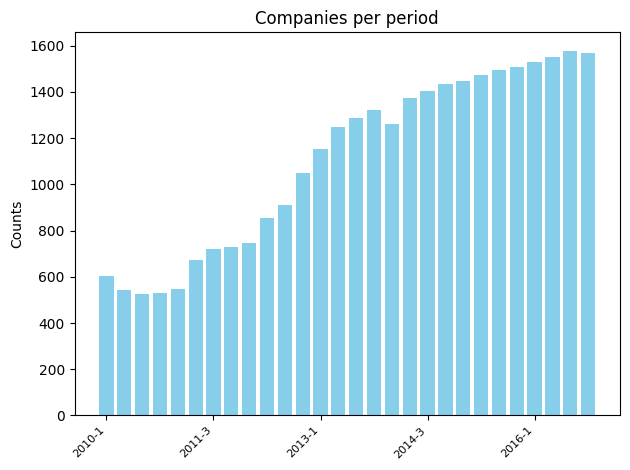

In [22]:
company_by_date = []
group_yq = df.groupby(["year", "quarter"])["symbol"].nunique().reset_index()
group_yq["period"] = group_yq['year'].astype(str) + "-" + group_yq['quarter'].astype(str)
n = 6


plt.bar(group_yq['period'].tolist(), group_yq['symbol'].tolist(), color= "skyblue")
plt.title("Companies per period")
plt.ylabel('Counts')
plt.xticks([i for i in range(len(group_yq["period"])) if i % n == 0], 
           [label for i, label in enumerate(group_yq["period"]) if i % n == 0],
           rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [7]:
df.date = pd.to_datetime(df.date)
df.describe()

,quarter,year,date
count,31072.000000,31072.000000,31072
mean,2.544252,2013.659919,2014-03-14 10:22:57.342945024
min,1.000000,2010.000000,2009-04-29 00:00:00
25%,2.000000,2012.000000,2012-11-05 00:00:00
50%,3.000000,2014.000000,2014-05-08 00:00:00
75%,4.000000,2015.000000,2015-10-22 00:00:00
max,4.000000,2016.000000,2017-05-23 00:00:00
std,1.114002,1.844903,NaN


In [32]:
df.sort_values(by = "date", ascending=False).head()

,symbol,quarter,year,earnings_call_datetime,content,source,web,date
26962,TCS,4,2016,2017-05-23 22:23:05,Operator: Greetings and welcome to The Contain...,web,True,2017-05-23
25025,SGMS,1,2016,2017-04-28 17:00:00,Operator: Good day everyone and welcome to the...,web,True,2017-04-28
19221,MTSC,4,2016,2017-04-11 14:56:05,"Operator: Good day, and welcome to the MTS Fis...",web,True,2017-04-11
3347,BBBY,4,2016,2017-04-06 17:00:00,Operator: Welcome to the Bed Bath & Beyond's f...,web,True,2017-04-06
14601,INSW,4,2016,2017-03-31 17:57:03,"Operator: Good day, and welcome to the Interna...",web,True,2017-03-31


In [33]:
print(df.iloc[25025, -4][:600])

Operator: Good day everyone and welcome to the Scientific Games First Quarter 2017 Investor Conference Call. All participants will be in a listen-only mode. [Operator Instructions] After today's presentation, there will be an opportunity to ask questions. [Operator Instructions] Please also note, that today's event is being recorded. At this time, I would like to turn the conference call over to Bill Pfund, Head of Investor Relations. Sir, please go ahead.
Bill Pfund: Thank you, Jamie. Good afternoon, everyone. During today's call, we will discuss our 2017 first quarter results and operating p


In [10]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 1
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation = df.date - matched_date
deviation.describe()

count                         31072
mean     56 days 13:38:23.295571576
std      93 days 07:12:11.709384442
min             -249 days +00:00:00
25%                25 days 00:00:00
50%               111 days 00:00:00
75%               122 days 00:00:00
max               484 days 00:00:00
dtype: object

In [38]:
df[deviation.dt.days > 250]

,symbol,quarter,year,earnings_call_datetime,content,source,web,date
1467,ALR,4,2013,2014-09-18 14:50:20,"Operator: Good day, and welcome to the Five St...",web,True,2014-09-18
15316,JCI,2,2011,2012-04-26 15:27:03,Operator Welcome to the Tyco second quarter ea...,web,True,2012-04-26
17466,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w...",web,True,2015-04-30
21622,PAHC,1,2014,2014-11-12 16:00:00,"Operator: Good day, ladies and gentlemen, and...",web,True,2014-11-12
25025,SGMS,1,2016,2017-04-28 17:00:00,Operator: Good day everyone and welcome to the...,web,True,2017-04-28


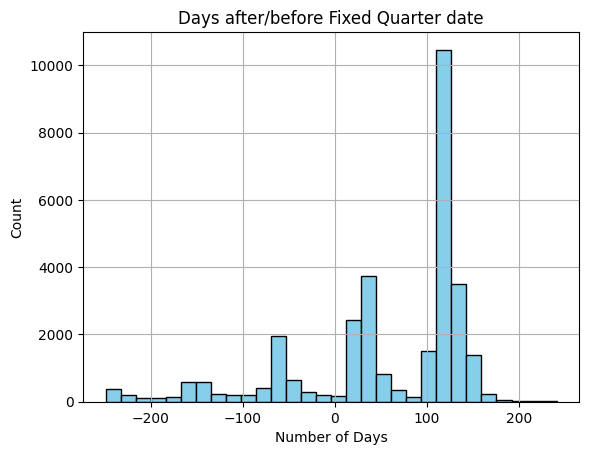

In [40]:
plt.hist(deviation.dt.days[deviation.dt.days < 250], color='skyblue', edgecolor='black', bins = 30);
plt.title("Days after/before Fixed Quarter date")
plt.xlabel("Number of Days")
plt.ylabel("Count")
plt.grid()

count     31072.000000
mean      46452.572573
std       14472.082293
min         201.000000
25%       36374.500000
50%       47568.000000
75%       55965.000000
max      210769.000000
Name: content, dtype: float64

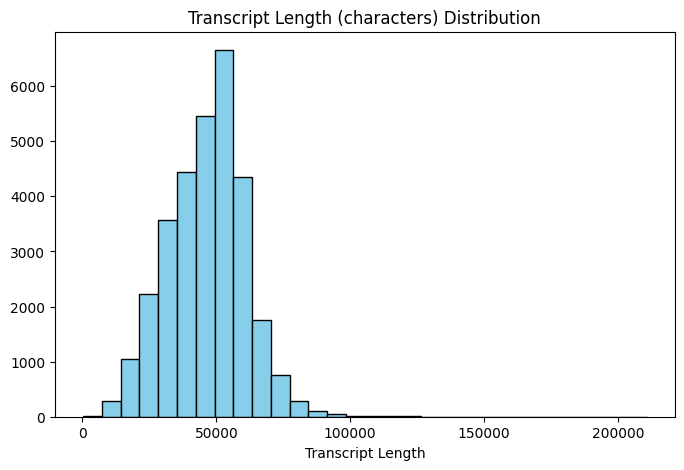

In [23]:
display(df['content'].str.len().describe())
length_char = df['content'].str.len()
plt.figure(figsize=(8, 5))
plt.hist(length_char, bins=30, color='skyblue', edgecolor='black')
plt.title('Transcript Length (characters) Distribution')
plt.xlabel('Transcript Length')
plt.show()